# k-NN

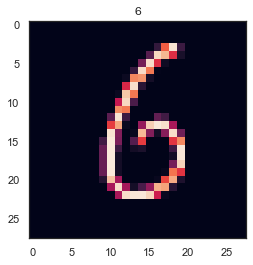

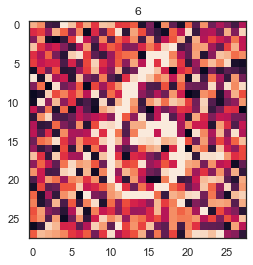

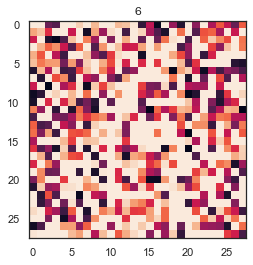

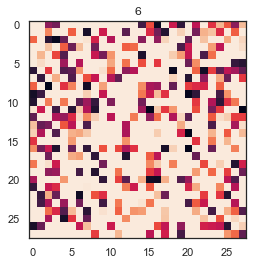

In [126]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")


# Get the data
dat_clean = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset.txt")
dat_light = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset-Light-Corruption.txt")
dat_medium = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset-Moderate-Corruption.txt")
dat_heavy = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset-Heavy-Corruption.txt")

labels = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset-labels.txt").astype(int)


# Split into individual pictures
dat_clean = np.array_split(dat_clean,len(dat_clean)//784)
dat_light = np.array_split(dat_light,len(dat_light)//784)
dat_medium = np.array_split(dat_medium,len(dat_medium)//784)
dat_heavy = np.array_split(dat_heavy,len(dat_heavy)//784)


# Draw some examples
def img(data,i):
    return data[i].reshape((28,28))

def show(data,i):
    plt.imshow(img(data,i).T)
    plt.title(labels[i])
    plt.show()

k = 3
show(dat_clean,k)
show(dat_light,k)
show(dat_medium,k)
show(dat_heavy,k)

In [127]:
dat = dat_clean

N = 100

def dist(x1,x2):
    return (x1-x2).T@(x1-x2)

def knn(i):
    dists = dist(np.array(dat[:N]).T, np.tile(dat[i],(N,1)).T)
    dists = np.diag(dists)
    
    nbs = labels[np.argsort(dists)][:50]
    
    guesses = np.cumsum(nbs)/np.arange(1,len(nbs)+1)
    return np.round(guesses)


def loss(y_pred,y_true):
    return 1-np.equal(y_pred, y_true)

def loss_n(n):
    return loss(knn(n),labels[n])



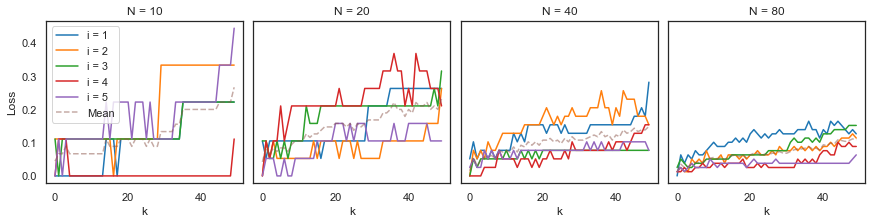

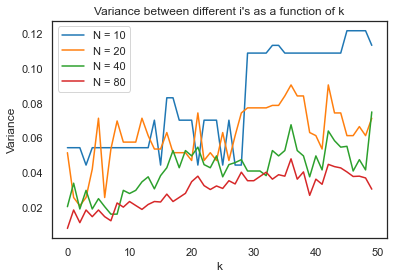

In [134]:
fig, axs = plt.subplots(1,4,figsize = (12,3),constrained_layout = 1,sharey=True)

axs[0].set_ylabel("Loss")
stds = []

Ns = [10,20,40,80]
for ind in range(len(Ns)):
    n = Ns[ind]
    
    ls = []
    for i in range(1,6):
        losses = array([loss_n(k) for k in range(100 + i*n + 1, 100 + (i+1)*n)])
        losses = np.mean(losses,axis = 0)
        ls.append(losses)
        axs[ind].plot(losses,label = f"i = {i}")
    stds.append(np.std(ls,axis = 0))
    axs[ind].plot(np.mean(ls,axis = 0),"--",label = "Mean",alpha=0.5)
    axs[ind].set_title(f"N = {n}")
    axs[ind].set_xlabel("k")
    
axs[0].legend()

plt.show()
for i, m in enumerate(stds):
    plt.plot(m,label = f"N = {Ns[i]}")

plt.xlabel("k")
plt.ylabel("Variance")
plt.title("Variance between different i's as a function of k")
plt.legend()
plt.show()


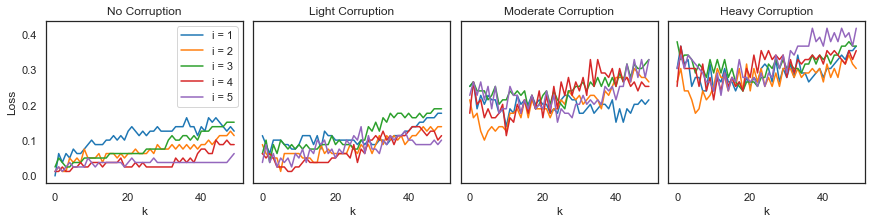

In [143]:
def make_plot(ax):
    n = 80
    ls = []
    for i in range(1,6):
        losses = array([loss_n(k) for k in range(100 + i*n + 1, 100 + (i+1)*n)])
        losses = np.mean(losses,axis = 0)
        ls.append(losses)
        ax.plot(losses,label = f"i = {i}",alpha = 2*0.5)
    
#     ax.plot(np.mean(ls,axis=0),'--',label="mean",alpha=0.5)
    ax.set_xlabel("k")

fig, axs = plt.subplots(1,4,figsize = (12,3),constrained_layout = 1,sharey=True)


# BAAAAD coding practice!
dat = dat_clean
make_plot(axs[0])
axs[0].set_ylabel("Loss")
axs[0].set_title("No Corruption")
axs[0].legend()


dat = dat_light
make_plot(axs[1])
axs[1].set_title("Light Corruption")

dat = dat_medium
make_plot(axs[2])
axs[2].set_title("Moderate Corruption")

dat = dat_heavy
make_plot(axs[3])
axs[3].set_title("Heavy Corruption")

plt.show()

# Linear Regression

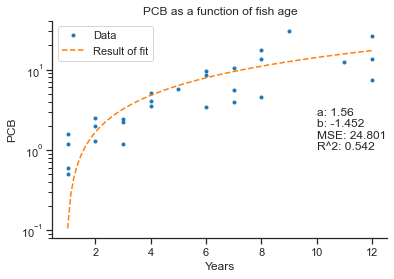

In [123]:
import numpy as np
from numpy import array
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style("ticks")
sns.set_context("notebook")

with open("PCB.dt") as file:
    dat = np.genfromtxt(file, delimiter = "\t").T



def lin_reg(x,y):
    X = array([x,np.ones(len(x))]).T

    w = inv(X.T @ X) @ X.T @ y
    
    return w.T

def prettyplot(x,y,func):
    plt.figure()
    plt.yscale("log")
    plt.plot(x,y,'.',label = "Data")
    
    xx = np.linspace(min(x),max(x),100)
    y_pred = func(xx)
    plt.plot(xx,y_pred,'--',label = "Result of fit")
    
    y_pred = func(x)
    MSE = np.mean((y-y_pred)**2)
    
    R_sqr = 1-sum((y-y_pred)**2)/sum((y-np.mean(y))**2)
    plt.text(10,1,"a: {:.3}\nb: {:.3f}\nMSE: {:.3f}\nR^2: {:.3f}".format(w[0],w[1],MSE,R_sqr))    
    
    plt.xlabel("Years")
    plt.ylabel("PCB")
    plt.title("PCB as a function of fish age")
    plt.legend()
    sns.despine()
    
    plt.show()

y = dat[1].T
x = dat[0]

w = lin_reg(x,y)


prettyplot(x,y,lambda x: w[0]*x+w[1])




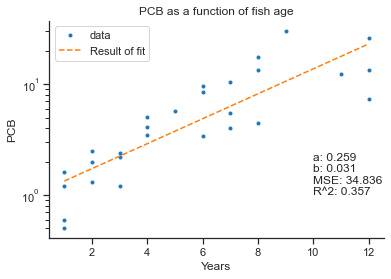

In [121]:
exp_model = lambda x, a, b: np.exp(a*x + b)

y_ln = np.log(y)

w = lin_reg(x,y_ln)


prettyplot(x,y,lambda x: exp_model(x,w[0], w[1]))




In [110]:


print("R^2 is",R_sqr)

R^2 is 0.3570135731609846


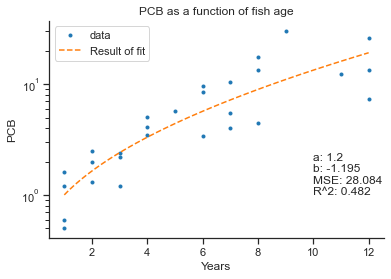

In [122]:
sqr_x = np.sqrt(x)

w = lin_reg(sqr_x,y_ln)


prettyplot(x,y,lambda x: exp_model(np.sqrt(x),w[0], w[1]))
